# Data visualistation with matplotlib


## 1. Import matplotlib modules

In [1]:
import matplotlib

Matplotlib has many different backends, usually its fine to stick to the default. But sometimes it is necessary to change the backend (before importing the plotting module ```pyplot```). The full list of available backends reads:

[u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']

When working from within a jupyter notebook, we can choose *matplotlib* backend with a magic function

In [2]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [4]:
%matplotlib inline
#% matplotlib notebook

Now, we import ```pyplot``` the main plotting module of *matplotlib*

In [5]:
import matplotlib.pyplot as plt

## 2. The default plot

Let's create some data (normal distribution)

In [6]:
import numpy as np
data = np.random.normal(loc=5., scale=2., size=(10000,))

and plot a simple histogram of our data

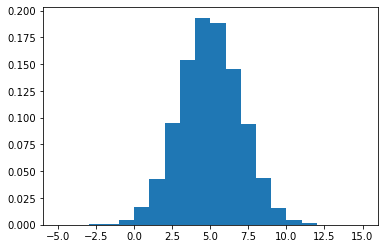

In [13]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True, stacked=True)
plt.show()

## 3. Adding more to the plot

First, we are going to fit a Gaussian profile to our function

In [9]:
from scipy.stats import norm
mu,sigma = norm.fit(data)

and plot it on top of our histogram

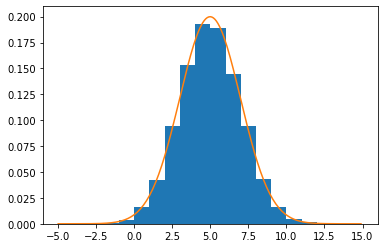

In [12]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True, stacked=True)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma))
plt.show()

let's make a bit easier to read (colors, legends, axis lables, etc..)

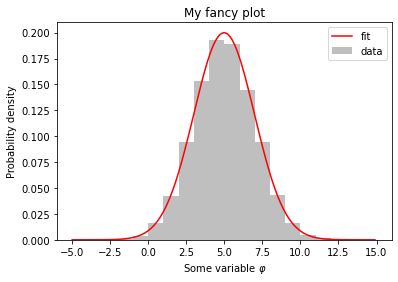

In [15]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, stacked=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.set_ylabel(r'Probability density')
ax.legend(loc=1)
plt.show()

## 4. More changes to the plot

Our plot looks already quite good, but some of the features don't give any extra information so why not removing them

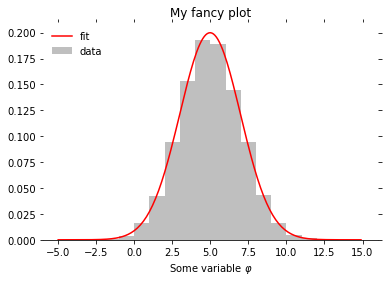

In [22]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, stacked=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
plt.show()

## 5. Saving the plot as a PDF

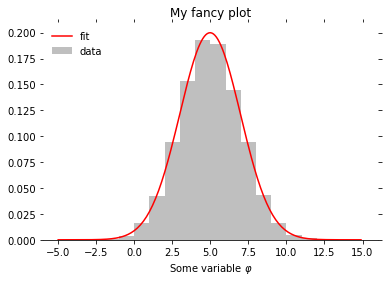

In [17]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, stacked=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
fig.savefig('my_fancy_plot.pdf', format='pdf', bbox_inches='tight')

## 6. My own plot

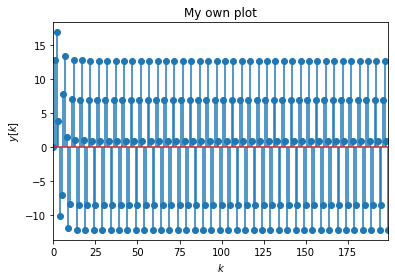

In [32]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
a = 0.7
k = np.arange(0, 200)
x = 3*np.sin(2*np.pi*0.2*k)
y = signal.lfilter([4.5, 0], [1, -a], x)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My own plot')
ax.stem(k,y, label='data')
ax.set(xlim=(0, k[-1]))
ax.set_xlabel('$k$')
ax.set_ylabel('$y[k]$')
plt.show()
fig.savefig('my_own_plot.pdf', format='pdf', bbox_inches='tight')